# Zomato Data Analysis using Python

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_zomato = pd.read_csv("Zomato-data.csv")
df_zomato

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


#### Step 1 - Data Cleaning

In [7]:
# convert the rate colum to a float by removing denominator character

def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df_zomato['rate']=df_zomato['rate'].apply(handleRate)
df_zomato

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [8]:
# Getting summary of the dataframe

df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [10]:
# Checking for missing or null values to identify any data gaps

df_zomato.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

<Axes: xlabel='listed_in(type)', ylabel='count'>

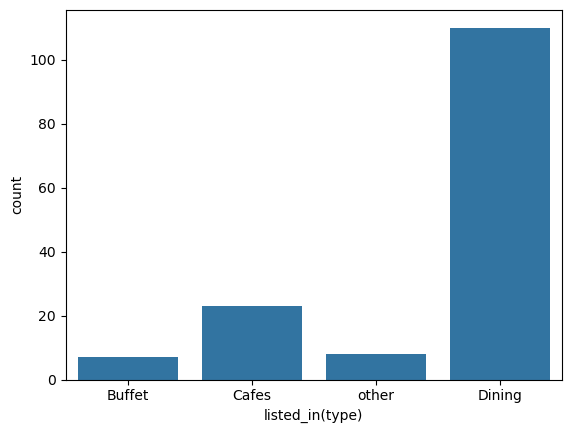

In [14]:
# to identify popular restaurant categories

sns.countplot(x=df_zomato['listed_in(type)'])

# Conclusion: The majority of the restaurants fall into the dining category.

<Axes: xlabel='Type of restaurant', ylabel='Votes'>

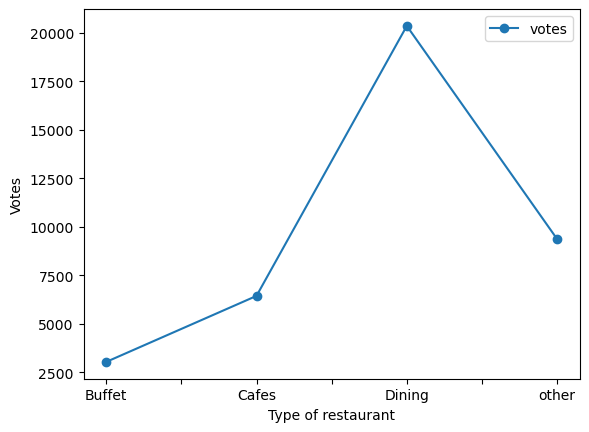

In [26]:
#  get the count of votes for each category

grouped_data = df_zomato.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data}).reset_index().set_index('listed_in(type)')
result.plot(kind='line',xlabel='Type of restaurant',ylabel='Votes',marker='o')

#Conclusion: Dining restaurants are preferred by a larger number of individuals.

In [30]:
# to find the restaurant with the highest number of votes

max_votes = df_zomato['votes'].max()
restaurant_with_max_votes = df_zomato.loc[df_zomato['votes'] == max_votes, 'name']
restaurant_with_max_votes

38    Empire Restaurant
Name: name, dtype: object

<Axes: xlabel='online_order', ylabel='count'>

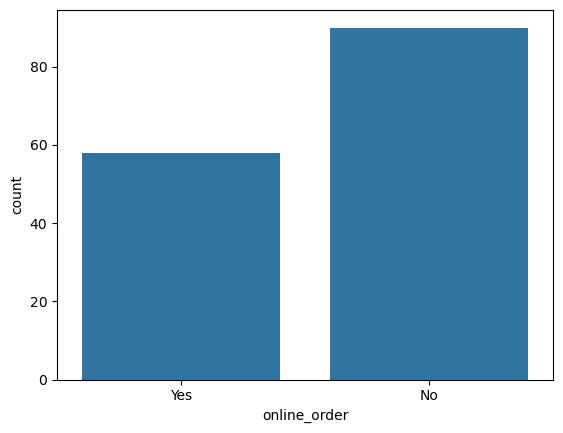

In [33]:
# Exploring the online_order column to see how many restaurants accept online orders

sns.countplot(x=df_zomato['online_order'])

# Conclusion: This suggests that a majority of the restaurants do not accept online orders.

<Axes: ylabel='Frequency'>

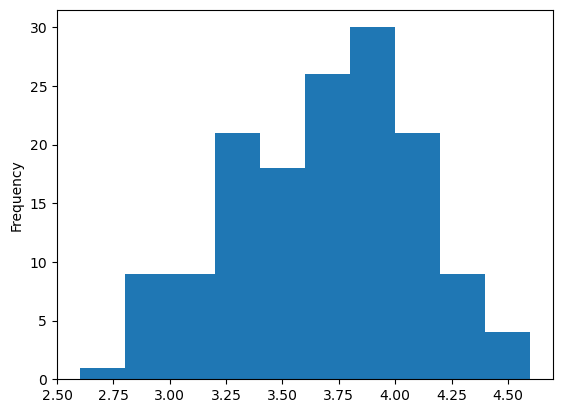

In [45]:
# Checking the distribution of ratings from the rate column

df_zomato['rate'].plot(kind='hist')

# Conclusion: The majorty of restaurants received ratings ranging from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

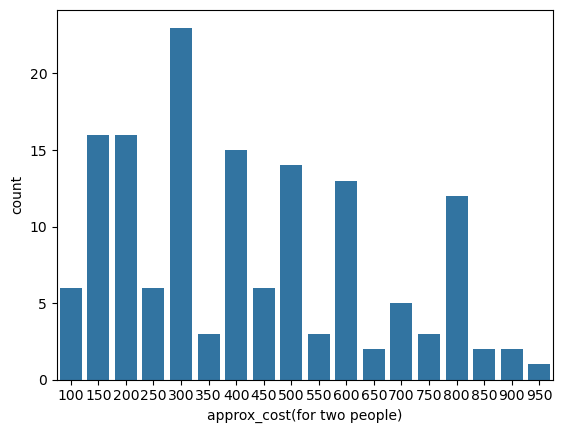

In [48]:
# Analyze the approx_cost(for two people) column to find the preferred price range.

couple_data = df_zomato['approx_cost(for two people)']
sns.countplot(x=couple_data)

# Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

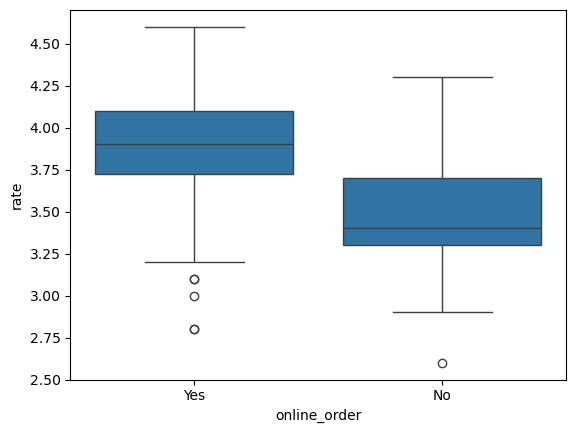

In [50]:
# Compare ratings between restaurants that accept online orders and those that don't

sns.boxplot(x = 'online_order', y = 'rate', data = df_zomato)

# Conclusion: Offline orders received lower ratings in comparison to online orders which obtained excellent ratings

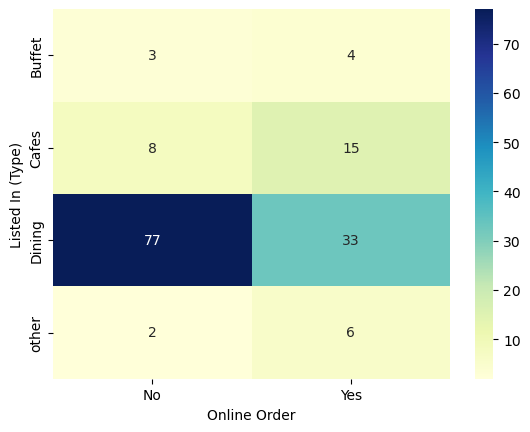

In [63]:
# Find the relationship between order mode and restaurant type

pivot_table = df_zomato.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
#plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

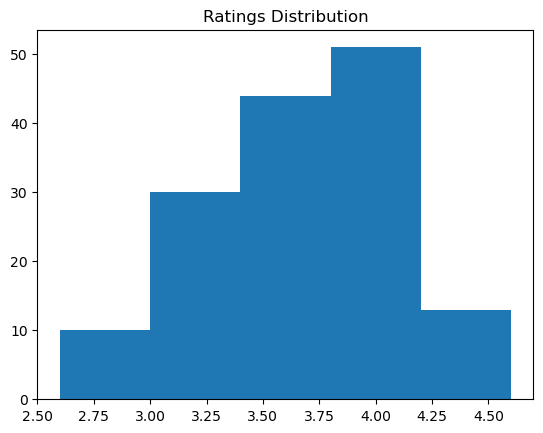

In [62]:
plt.hist(df_zomato['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()